In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
train_data=pd.read_csv('/content/drive/My Drive/word embedding/train.csv',index_col='id',encoding='Latin-1')
test_data=pd.read_csv('/content/drive/My Drive/word embedding/test.csv',index_col='id', encoding='Latin-1')
test_data = test_data[test_data['relevance']!=-1]

#Pre processing

Clean sentances - without stop words and with stemming  

In [4]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer

nltk.download('stopwords')
sw=stopwords.words('english')
ps = PorterStemmer()
def stop_words(data):
  toReturn=''
  for word in data.split(' '):
    if word.lower() not in sw:
      toReturn = toReturn + ps.stem(word.lower()) + ' '
  return toReturn.strip()
def clean_sentance(df):
  data=df.copy()
  data['product_title']=data['product_title'].apply(lambda x: stop_words(x))
  data['search_term']=data['search_term'].apply(lambda x: stop_words(x))
  return data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def split_to_chars(df):
  data=df.copy()
  data['product_title']=data['product_title'].apply(lambda x: [char for char in x if char != ' '])
  data['search_term']=data['search_term'].apply(lambda x: [char for char in x if char != ' '])
  return data

In [0]:
train_data

,product_uid,product_title,search_term,relevance
id,,,,
2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67
...,...,...,...,...
221457,206638,Atlantic Windowpane 576 CD or 192 DVD Blu-Ray ...,tv riser glass,1.00
221458,206639,Philips 40-Watt Halogen R20 Flood Light Bulb (...,r20 halogen light,3.00
221463,206641,Schlage Camelot In-Active Aged Bronze Handlese...,schlage lock siena half dummy knob with,2.33


In [0]:
train=clean_sentance(train_data)
test=clean_sentance(test_data)


In [0]:
train

,product_uid,product_title,search_term,relevance
id,,,,
2,100001,simpson strong-ti 12-gaug angl,angl bracket,3.00
3,100001,simpson strong-ti 12-gaug angl,l bracket,2.50
9,100002,behr premium textur deckov 1-gal. #sc-141 tugb...,deck,3.00
16,100005,delta vero 1-handl shower faucet trim kit chro...,rain shower head,2.33
17,100005,delta vero 1-handl shower faucet trim kit chro...,shower faucet,2.67
...,...,...,...,...
221457,206638,atlant windowpan 576 cd 192 dvd blu-ray game m...,tv riser glass,1.00
221458,206639,philip 40-watt halogen r20 flood light bulb (1...,r20 halogen light,3.00
221463,206641,schlage camelot in-act age bronz handleset lef...,schlage lock siena half dummi knob,2.33


In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import *
from keras.models import Model
from keras.optimizers import *

Using TensorFlow backend.


In [0]:
train_s1=train['product_title']
train_s2=train['search_term']
y=train['relevance']

In [0]:
train_s1

id
2                            simpson strong-ti 12-gaug angl
3                            simpson strong-ti 12-gaug angl
9         behr premium textur deckov 1-gal. #sc-141 tugb...
16        delta vero 1-handl shower faucet trim kit chro...
17        delta vero 1-handl shower faucet trim kit chro...
                                ...                        
221457    atlant windowpan 576 cd 192 dvd blu-ray game m...
221458    philip 40-watt halogen r20 flood light bulb (1...
221463    schlage camelot in-act age bronz handleset lef...
221471    plastec 11 in. x 24 in. rose garden wall decor...
221473    lichtenberg pool blue no. 918 millenni ryan he...
Name: product_title, Length: 74067, dtype: object

In [0]:
y

id
2         3.00
3         2.50
9         3.00
16        2.33
17        2.67
          ... 
221457    1.00
221458    3.00
221463    2.33
221471    3.00
221473    2.33
Name: relevance, Length: 74067, dtype: float64

Replase symbols that appear fewer times with a placeholder

In [0]:
from collections import Counter
unique_symbols = Counter()

for _, message in train_s1.iteritems():
    unique_symbols.update(message)
    
print("Unique symbols:", len(unique_symbols))


# Find symbols that appear fewer times than the threshold:

uncommon_symbols = list()

for symbol, count in unique_symbols.items():
    if count < 5:
        uncommon_symbols.append(symbol)

print("Uncommon symbols:", len(uncommon_symbols))


# Replace them with a placeholder:

DUMMY = uncommon_symbols[0]
tr_table = str.maketrans("".join(uncommon_symbols), DUMMY * len(uncommon_symbols))

train_s1 = train_s1.apply(lambda x: x.translate(tr_table))


# We will need the number of unique symbols further down when we will decide on the dimensionality of inputs.

num_unique_symbols = len(unique_symbols) - len(uncommon_symbols) + 1 

Unique symbols: 75
Uncommon symbols: 5


Tokenizer of product_title feture by characters







In [0]:
tokenizer = Tokenizer(
    char_level=True,
    filters=None,
    lower=False,
)

tokenizer.fit_on_texts(train_s1)
train_s1_seq = tokenizer.texts_to_sequences(train_s1)
train_s1_seq = pad_sequences(train_s1_seq, maxlen=300, padding='post')
#train_s2_seq = pad_sequences(train_s2, padding='post')


Replase symbols that appear fewer times with a placeholder

In [0]:
from collections import Counter
unique_symbols = Counter()

for _, message in train_s2.iteritems():
    unique_symbols.update(message)
    
print("Unique symbols:", len(unique_symbols))


# Find symbols that appear fewer times than the threshold:

uncommon_symbols = list()

for symbol, count in unique_symbols.items():
    if count < 5:
        uncommon_symbols.append(symbol)

print("Uncommon symbols:", len(uncommon_symbols))


# Replace them with a placeholder:

DUMMY = uncommon_symbols[0]
tr_table = str.maketrans("".join(uncommon_symbols), DUMMY * len(uncommon_symbols))

train_s2 = train_s2.apply(lambda x: x.translate(tr_table))


# We will need the number of unique symbols further down when we will decide on the dimensionality of inputs.

num_unique_symbols2 = len(unique_symbols) - len(uncommon_symbols) + 1 

Unique symbols: 51
Uncommon symbols: 2


Tokenizer of search_term feture by characters

In [0]:
tokenizer = Tokenizer(
    char_level=True,
    filters=None,
    lower=False,
)
tokenizer.fit_on_texts(train_s2)
train_s2_seq = tokenizer.texts_to_sequences(train_s2)
train_s2_seq = pad_sequences(train_s2_seq, maxlen=300, padding='post')

In [0]:
train_s1_seq=train_s1_seq.reshape(-1,1,300)
train_s2_seq=train_s2_seq.reshape(-1,1,300)

# Model based character level



In [0]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train, y_test = train_test_split(train_s1_seq, y, test_size=0.2)
x_train2, x_test2, y_train2, y_test = train_test_split(train_s2_seq, y, test_size=0.2)
x_train1, x_val1, y_train, y_val = train_test_split(x_train1, y_train, test_size=0.1)
x_train2, x_val2, y_train2, y_val = train_test_split(x_train2, y_train2, test_size=0.1)

In [0]:
import keras.backend as K
def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)

def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)
input_1 = Input(shape=(1,300))
input_2 = Input(shape=(1,300))
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
common_lstm = LSTM(64,return_sequences=True, activation="relu")
vector_1 = common_lstm(input_1)
vector_1 = Flatten()(vector_1)

vector_2 = common_lstm(input_2)
vector_2 = Flatten()(vector_2)

x3 = Subtract()([vector_1, vector_2])
x4= Add()([vector_1, vector_2])
x5=Multiply()([vector_1, vector_2])

    
conc = Concatenate(axis=-1)([x5,x4, x3])

x = Dense(100, activation="relu", name='conc_layer')(conc)
x = Dropout(0.01)(x)
out = Dense(1, activation="relu", name = 'out')(x)

model = Model([input_1, input_2], out)
model.compile(loss=root_mean_squared_error, optimizer=Adam(0.00001))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 300)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1, 300)       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 1, 64)        93440       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 64)           0           lstm_1[0][0]               

In [0]:
import time
siam_time=time.time()
model.fit([x_train1,x_train2],y_train.values.reshape(-1,1), epochs = 20,
          batch_size=64, validation_data=([x_val1, x_val2],y_val.values.reshape(-1,1)))
siam_time=time.time()-siam_time

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 53327 samples, validate on 5926 samples
Epoch 1/20





53327/53327 [==============================] - 18s 337us/step - loss: 1.6474 - val_loss: 1.2738
Epoch 2/20
53327/53327 [==============================] - 8s 143us/step - loss: 1.1341 - val_loss: 1.0182
Epoch 3/20
53327/53327 [==============================] - 7s 140us/step - loss: 0.9651 - val_loss: 0.9072
Epoch 4/20
53327/53327 [==============================] - 7s 139us/step - loss: 0.8798 - val_loss: 0.8431
Epoch 5/20
53327/53327 [==============================] - 8s 148us/step - loss: 0.8275 - val_loss: 0.7976
Epoch 6/20
53327/53327 [==============================] - 8s 147us/step - loss: 0.7890 - val_loss: 0.7641
Epoch 7/20
53327/53327 [==============================] - 8s 143us/step - loss: 0.7555 - val_loss: 0.7356
Epoch 8/20
53327/53327 [==============================] - 8s 141us/step - loss: 0.7324 - val_loss: 0.7121


Evaluation by RMSE and MAE

In [0]:
siam_pred_time=time.time()
siam_train_pred=model.predict([x_train1,x_train2])
siam_val_pred=model.predict([x_val1, x_val2])
siam_test_pred=model.predict([x_test1, x_test2])
siam_pred_time=time.time()-siam_pred_time

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
lstm_rmse_train = sqrt(mean_squared_error(y_train, siam_train_pred))
lstm_rmse_val = sqrt(mean_squared_error(y_val, siam_val_pred))
lstm_rmse_test = sqrt(mean_squared_error(y_test, siam_test_pred))
lstm_mae_train=mean_absolute_error(y_train, siam_train_pred)
lstm_mae_val=mean_absolute_error(y_val, siam_val_pred)
lstm_mae_test=mean_absolute_error(y_test, siam_test_pred)
print('******************LSTM***********************')
print("TRAIN: RMSE: %f , MAE: %f" % (lstm_rmse_train,lstm_mae_train))
print("VALIDATE: RMSE: %f , MAE: %f" % (lstm_rmse_val,lstm_mae_val))
print("TEST: RMSE: %f , MAE: %f" % (lstm_rmse_test,lstm_mae_test))
print('taining time : ' + str(siam_time))
print('prediction time : ' + str(siam_pred_time))

******************LSTM***********************
TRAIN: RMSE: 0.583946 , MAE: 0.475784
VALIDATE: RMSE: 0.606638 , MAE: 0.494308
TEST: RMSE: 0.606863 , MAE: 0.496238
taining time : 159.12244248390198
prediction time : 7.081084489822388


# Naive linear regression on character level


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
 #dummy function for CountVectorizer
def dummy_fun(doc):
    return doc

lr_model=Pipeline([('vect', CountVectorizer(analyzer='char',
     tokenizer=dummy_fun,
     preprocessor=dummy_fun,
     token_pattern=None)),
               ('clf', LinearRegression())
              ])
train['combined'] = train[['product_title', 'search_term']].apply(lambda x: ''.join(x), axis=1)

In [0]:
def split_chars(df):
  data=df.copy()
  data['combined']=data['combined'].apply(lambda x: [char for char in x if char != ' '])
  return data
#train=split_chars(train)
train['combined']=train['combined'].astype(str)
lr_train, lr_test, y_train, y_test = train_test_split(train['combined'], y, test_size=0.2)
lr_train, lr_val, y_train, y_val = train_test_split(lr_train, y_train, test_size=0.1)

In [0]:
lr_time=time.time()
lr_model.fit(lr_train,y_train)
lr_time=time.time()-lr_time

In [0]:
lr_pred_time=time.time()
lr_val_pred=lr_model.predict(lr_val)
lr_test_pred=lr_model.predict(lr_test)
lr_train_pred=lr_model.predict(lr_train)
lr_pred_time=time.time()-lr_pred_time

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
lr_rmse_train = sqrt(mean_squared_error(y_train, lr_train_pred))
lr_rmse_val = sqrt(mean_squared_error(y_val, lr_val_pred))
lr_rmse_test = sqrt(mean_squared_error(y_test, lr_test_pred))
lr_mae_train=mean_absolute_error(y_train, lr_train_pred)
lr_mae_val=mean_absolute_error(y_val, lr_val_pred)
lr_mae_test=mean_absolute_error(y_test, lr_test_pred)
print('******************naive linear regression***********************')
print("TRAIN: RMSE: %f , MAE: %f" % (lr_rmse_train,lr_mae_train))
print("VALIDATE: RMSE: %f , MAE: %f" % (lr_rmse_val,lr_mae_val))
print("TEST: RMSE: %f , MAE: %f" % (lr_rmse_test,lr_mae_test))
print('test time : ' + str(lr_time))
print('prediction time : ' + str(lr_pred_time))

******************naive linear regression***********************
TRAIN: RMSE: 0.531074 , MAE: 0.435518
VALIDATE: RMSE: 0.531780 , MAE: 0.435848
TEST: RMSE: 0.530758 , MAE: 0.435205
test time : 2.101875066757202
prediction time : 1.6222164630889893


#Features extraction

In [0]:
feature_extract=model.layers[-3].output

In [0]:
newModel=Model([input_1, input_2], feature_extract)

In [0]:
newModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 1, 300)       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1, 300)       0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 1, 64)        93440       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 64)           0           lstm_1[0][0]               

In [0]:
fe_train=newModel.predict(([x_train1,x_train2]))
fe_val=newModel.predict(([x_val1,x_val2]))
fe_test=newModel.predict(([x_test1,x_test2]))

In [0]:
fe_train.shape

(53327, 100)

# Xgboost model

In [0]:
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.2,
                alpha = 10, n_estimators = 50)
knn_reg=KNeighborsRegressor(n_neighbors=3,weights='uniform')

In [0]:
xgb_train_time=time.time()
xg_reg.fit(fe_train,y_train)
xgb_train_time=time.time()-xgb_train_time

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[07:11:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


# Knn model

In [0]:
knn_train_time=time.time()
knn_reg.fit(fe_train,y_train)
knn_train_time=time.time()-knn_train_time

In [0]:
xgb_predict_time=time.time()
xgb_train_pred=xg_reg.predict(fe_train)
xgb_val_pred=xg_reg.predict(fe_val)
xgb_test_pred=xg_reg.predict(fe_test)
xgb_predict_time=time.time()-xgb_predict_time

In [0]:
knn_predict_time=time.time()
knn_train_pred=knn_reg.predict(fe_train)
knn_val_pred=knn_reg.predict(fe_val)
knn_test_pred=knn_reg.predict(fe_test)
knn_predict_time=time.time()-knn_predict_time

In [0]:

xgb_rmse_train = sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_rmse_val = sqrt(mean_squared_error(y_val, xgb_val_pred))
xgb_rmse_test = sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_mae_train=mean_absolute_error(y_train, xgb_train_pred)
xgb_mae_val=mean_absolute_error(y_val, xgb_val_pred)
xgb_mae_test=mean_absolute_error(y_test, xgb_test_pred)
print('******************XGB***********************')
print("TRAIN: RMSE: %f , MAE: %f" % (xgb_rmse_train,xgb_mae_train))
print("VALIDATE: RMSE: %f , MAE: %f" % (xgb_rmse_val,xgb_mae_val))
print("TEST: RMSE: %f , MAE: %f" % (xgb_rmse_test,xgb_mae_test))
print('training time : ' + str(xgb_train_time))
print('prediction time : ' + str(xgb_predict_time))

******************XGB***********************
TRAIN: RMSE: 0.529514 , MAE: 0.433945
VALIDATE: RMSE: 0.534574 , MAE: 0.438108
TEST: RMSE: 0.534010 , MAE: 0.437845
training time : 5.471521377563477
prediction time : 0.12833356857299805


In [0]:
knn_rmse_train = sqrt(mean_squared_error(y_train, knn_train_pred))
knn_rmse_val = sqrt(mean_squared_error(y_val, knn_val_pred))
knn_rmse_test = sqrt(mean_squared_error(y_test, knn_test_pred))
knn_mae_train=mean_absolute_error(y_train, knn_train_pred)
knn_mae_val=mean_absolute_error(y_val, knn_val_pred)
knn_mae_test=mean_absolute_error(y_test, knn_test_pred)
print('******************KNN***********************')
print("TRAIN: RMSE: %f , MAE: %f" % (knn_rmse_train,knn_mae_train))
print("VALIDATE: RMSE: %f , MAE: %f" % (knn_rmse_val,knn_mae_val))
print("TEST: RMSE: %f , MAE: %f" % (knn_rmse_test,knn_mae_test))
print('training time : ' + str(knn_train_time))
print('prediction time : ' + str(knn_predict_time))

******************KNN***********************
TRAIN: RMSE: 0.437820 , MAE: 0.349824
VALIDATE: RMSE: 0.616387 , MAE: 0.499122
TEST: RMSE: 0.612174 , MAE: 0.494942
training time : 0.9693400859832764
prediction time : 689.6705441474915


# Compration between all of models

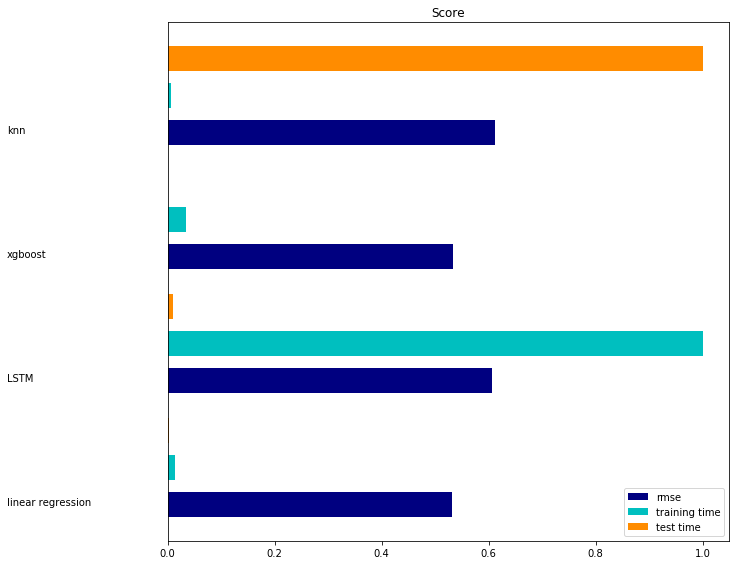

In [0]:
import numpy as np
import matplotlib.pyplot as plt
indices = np.arange(4)
clf_names=['linear regression','LSTM','xgboost','knn']
training_time=[lr_time,siam_time,xgb_train_time,knn_train_time]
test_time=[lr_pred_time,siam_pred_time,xgb_predict_time,knn_predict_time]
rmse=[lr_rmse_test,lstm_rmse_test,xgb_rmse_test,knn_rmse_test]
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, rmse, .2, label="rmse", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

In [0]:
train_s1=train['product_title']
train_s2=train['search_term']
y=train['relevance']

In [0]:
# from collections import Counter
# unique_symbols = Counter()

# for _, message in train_s1.iteritems():
#     unique_symbols.update(message)
    
# print("Unique symbols:", len(unique_symbols))


# # Find symbols that appear fewer times than the threshold:

# uncommon_symbols = list()

# for symbol, count in unique_symbols.items():
#     if count < 5:
#         uncommon_symbols.append(symbol)

# print("Uncommon symbols:", len(uncommon_symbols))


# # Replace them with a placeholder:

# DUMMY = uncommon_symbols[0]
# tr_table = str.maketrans("".join(uncommon_symbols), DUMMY * len(uncommon_symbols))

# train_s1 = train_s1.apply(lambda x: x.translate(tr_table))


# # We will need the number of unique symbols further down when we will decide on the dimensionality of inputs.

# num_unique_symbols = len(unique_symbols) - len(uncommon_symbols) + 1 
max_length1 = train_s1.map(len).max()

Tokenizer of product_title feture by words

In [0]:
tokenizer = Tokenizer(
    # char_level=True,
    lower=False,
)

tokenizer.fit_on_texts(train_s1)
train_s1_seq = tokenizer.texts_to_sequences(train_s1)
train_s1_seq = pad_sequences(train_s1_seq, maxlen=max_length1, padding='post')
vocab_size1 = len(tokenizer.word_index) + 1

In [0]:
# from collections import Counter
# unique_symbols = Counter()

# for _, message in train_s2.iteritems():
#     unique_symbols.update(message)
    
# print("Unique symbols:", len(unique_symbols))


# # Find symbols that appear fewer times than the threshold:

# uncommon_symbols = list()

# for symbol, count in unique_symbols.items():
#     if count < 5:
#         uncommon_symbols.append(symbol)

# print("Uncommon symbols:", len(uncommon_symbols))


# # Replace them with a placeholder:

# DUMMY = uncommon_symbols[0]
# tr_table = str.maketrans("".join(uncommon_symbols), DUMMY * len(uncommon_symbols))

# train_s2 = train_s2.apply(lambda x: x.translate(tr_table))


# # We will need the number of unique symbols further down when we will decide on the dimensionality of inputs.

# num_unique_symbols2 = len(unique_symbols) - len(uncommon_symbols) + 1 

max_length2 = train_s2.map(len).max()

Tokenizer of search_term feture by words

In [0]:
tokenizer = Tokenizer(
    # char_level=True,
    # filters=None,
    lower=False,
)
tokenizer.fit_on_texts(train_s2)
train_s2_seq = tokenizer.texts_to_sequences(train_s2)
train_s2_seq = pad_sequences(train_s2_seq, maxlen=max_length1, padding='post')
vocab_size2 = len(tokenizer.word_index) + 1

# Model based word level with embedded layer
 


In [0]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train, y_test = train_test_split(train_s1_seq, y, test_size=0.2)
x_train2, x_test2, y_train2, y_test = train_test_split(train_s2_seq, y, test_size=0.2)
x_train1, x_val1, y_train, y_val = train_test_split(x_train1, y_train, test_size=0.1)
x_train2, x_val2, y_train2, y_val = train_test_split(x_train2, y_train2, test_size=0.1)

In [13]:
import keras.backend as K
def cosine_distance(vests):
    x, y = vests
    x = K.l2_normalize(x, axis=-1)
    y = K.l2_normalize(y, axis=-1)
    return -K.mean(x * y, axis=-1, keepdims=True)


def cos_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0],1)
input_1 = Input(shape=(max_length1,))
input_2 = Input(shape=(max_length1,))

emb_1 = Embedding(vocab_size1, 64,input_shape=(max_length1,))(input_1)#, input_shape=(1,max_length1)
emb_2 = Embedding(vocab_size2, 64,input_shape=(max_length1,))(input_2)#, input_shape=(1,max_length2)

common_lstm = LSTM(64,return_sequences=True, activation="relu")
vector_1 = common_lstm(emb_1)
vector_1 = Flatten()(vector_1)

vector_2 = common_lstm(emb_2)
vector_2 = Flatten()(vector_2)

x3 = Subtract()([vector_1, vector_2])
x4= Add()([vector_1, vector_2])
x5=Multiply()([vector_1, vector_2])

conc = Concatenate(axis=-1)([x5,x4, x3])

x = Dense(100, activation="relu", name='conc_layer')(conc)
x = Dropout(0.01)(x)
out = Dense(1, activation="relu", name = 'out')(x)

model = Model([input_1, input_2], out)

model.compile(loss="mae", optimizer=Adam(0.00001))
model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 136)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 136)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 136, 64)      1084672     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 136, 64)      444672      input_

In [14]:
import time
siam_time=time.time()
model.fit([x_train1,x_train2],y_train.values.reshape(-1,1), epochs = 20,
          batch_size=64, validation_data=([x_val1, x_val2],y_val.values.reshape(-1,1)))
siam_time=time.time()-siam_time

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 53327 samples, validate on 5926 samples
Epoch 1/20





53327/53327 [==============================] - 370s 7ms/step - loss: 0.7661 - val_loss: 0.4335
Epoch 2/20
53327/53327 [==============================] - 357s 7ms/step - loss: 0.4408 - val_loss: 0.4361
Epoch 3/20
53327/53327 [==============================] - 353s 7ms/step - loss: 0.4405 - val_loss: 0.4344
Epoch 4/20
53327/53327 [==============================] - 349s 7ms/step - loss: 0.4396 - val_loss: 0.4315
Epoch 5/20
53327/53327 [==============================] - 350s 7ms/step - loss: 0.4385 - val_loss: 0.4342
Epoch 6/20
53327/53327 [==============================] - 352s 7ms/step - loss: 0.4371 - val_loss: 0.4336
Epoch 7/20
53327/53327 [==============================] - 351s 7ms/step - loss: 0.4356 - val_loss: 0.4337
Epoch 8/20
53327/53327 [==============================] - 351s 7ms/step - loss: 0.4326 - val_loss: 0.4355
E

Evaluation by RMSE and MAE

In [0]:
siam_pred_time=time.time()
siam_train_pred=model.predict([x_train1,x_train2])
siam_val_pred=model.predict([x_val1, x_val2])
siam_test_pred=model.predict([x_test1, x_test2])
siam_pred_time=time.time()-siam_pred_time

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
lstm_rmse_train = sqrt(mean_squared_error(y_train, siam_train_pred))
lstm_rmse_val = sqrt(mean_squared_error(y_val, siam_val_pred))
lstm_rmse_test = sqrt(mean_squared_error(y_test, siam_test_pred))
lstm_mae_train=mean_absolute_error(y_train, siam_train_pred)
lstm_mae_val=mean_absolute_error(y_val, siam_val_pred)
lstm_mae_test=mean_absolute_error(y_test, siam_test_pred)
print('******************LSTM***********************')
print("TRAIN: RMSE: %f , MAE: %f" % (lstm_rmse_train,lstm_mae_train))
print("VALIDATE: RMSE: %f , MAE: %f" % (lstm_rmse_val,lstm_mae_val))
print("TEST: RMSE: %f , MAE: %f" % (lstm_rmse_test,lstm_mae_test))
print('taining time : ' + str(siam_time))
print('prediction time : ' + str(siam_pred_time))

******************LSTM***********************
TRAIN: RMSE: 0.501700 , MAE: 0.392473
VALIDATE: RMSE: 0.569931 , MAE: 0.456952
TEST: RMSE: 0.566717 , MAE: 0.458565
taining time : 7021.600814580917
prediction time : 332.92998361587524


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
 #dummy function for CountVectorizer
def dummy_fun(doc):
    return doc

lr_model=Pipeline([('vect', CountVectorizer(analyzer='word',
     tokenizer=dummy_fun,
     preprocessor=dummy_fun,
     token_pattern=None)),
               ('clf', LinearRegression())
              ])
train['combined'] = train[['product_title', 'search_term']].apply(lambda x: ''.join(x), axis=1)

In [0]:
def split_chars(df):
  data=df.copy()
  data['combined']=data['combined'].apply(lambda x: [char for char in x if char != ' '])
  return data
#train=split_chars(train)
train['combined']=train['combined'].astype(str)
lr_train, lr_test, y_train, y_test = train_test_split(train['combined'], y, test_size=0.2)
lr_train, lr_val, y_train, y_val = train_test_split(lr_train, y_train, test_size=0.1)

In [0]:
lr_time=time.time()
lr_model.fit(lr_train,y_train)
lr_time=time.time()-lr_time

In [0]:
lr_pred_time=time.time()
lr_val_pred=lr_model.predict(lr_val)
lr_test_pred=lr_model.predict(lr_test)
lr_train_pred=lr_model.predict(lr_train)
lr_pred_time=time.time()-lr_pred_time

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from math import sqrt
lr_rmse_train = sqrt(mean_squared_error(y_train, lr_train_pred))
lr_rmse_val = sqrt(mean_squared_error(y_val, lr_val_pred))
lr_rmse_test = sqrt(mean_squared_error(y_test, lr_test_pred))
lr_mae_train=mean_absolute_error(y_train, lr_train_pred)
lr_mae_val=mean_absolute_error(y_val, lr_val_pred)
lr_mae_test=mean_absolute_error(y_test, lr_test_pred)
print('******************naive linear regression***********************')
print("TRAIN: RMSE: %f , MAE: %f" % (lr_rmse_train,lr_mae_train))
print("VALIDATE: RMSE: %f , MAE: %f" % (lr_rmse_val,lr_mae_val))
print("TEST: RMSE: %f , MAE: %f" % (lr_rmse_test,lr_mae_test))
print('test time : ' + str(lr_time))
print('prediction time : ' + str(lr_pred_time))

******************naive linear regression***********************
TRAIN: RMSE: 0.531310 , MAE: 0.435590
VALIDATE: RMSE: 0.528879 , MAE: 0.432180
TEST: RMSE: 0.530700 , MAE: 0.435868
test time : 1.8427410125732422
prediction time : 1.3176956176757812


#Features extraction

In [0]:
feature_extract=model.layers[-3].output

In [0]:
newModel=Model([input_1, input_2], feature_extract)

In [24]:
newModel.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 136)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 136)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 136, 64)      1084672     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 136, 64)      444672      input_2[0][0]                    
____________________________________________________________________________________________

In [0]:
fe_train=newModel.predict(([x_train1,x_train2]))
fe_val=newModel.predict(([x_val1,x_val2]))
fe_test=newModel.predict(([x_test1,x_test2]))

In [26]:
fe_train.shape

(53327, 100)

# Xgboost model

In [0]:
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.2,
                alpha = 10, n_estimators = 50)
knn_reg=KNeighborsRegressor(n_neighbors=3,weights='uniform')

In [28]:
xgb_train_time=time.time()
xg_reg.fit(fe_train,y_train)
xgb_train_time=time.time()-xgb_train_time

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:06:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
knn_train_time=time.time()
knn_reg.fit(fe_train,y_train)
knn_train_time=time.time()-knn_train_time

In [0]:
xgb_predict_time=time.time()
xgb_train_pred=xg_reg.predict(fe_train)
xgb_val_pred=xg_reg.predict(fe_val)
xgb_test_pred=xg_reg.predict(fe_test)
xgb_predict_time=time.time()-xgb_predict_time

# Knn model

In [0]:
knn_predict_time=time.time()
knn_train_pred=knn_reg.predict(fe_train)
knn_val_pred=knn_reg.predict(fe_val)
knn_test_pred=knn_reg.predict(fe_test)
knn_predict_time=time.time()-knn_predict_time

In [32]:
xgb_rmse_train = sqrt(mean_squared_error(y_train, xgb_train_pred))
xgb_rmse_val = sqrt(mean_squared_error(y_val, xgb_val_pred))
xgb_rmse_test = sqrt(mean_squared_error(y_test, xgb_test_pred))
xgb_mae_train=mean_absolute_error(y_train, xgb_train_pred)
xgb_mae_val=mean_absolute_error(y_val, xgb_val_pred)
xgb_mae_test=mean_absolute_error(y_test, xgb_test_pred)
print('******************XGB***********************')
print("TRAIN: RMSE: %f , MAE: %f" % (xgb_rmse_train,xgb_mae_train))
print("VALIDATE: RMSE: %f , MAE: %f" % (xgb_rmse_val,xgb_mae_val))
print("TEST: RMSE: %f , MAE: %f" % (xgb_rmse_test,xgb_mae_test))
print('training time : ' + str(xgb_train_time))
print('prediction time : ' + str(xgb_predict_time))

******************XGB***********************
TRAIN: RMSE: 0.530651 , MAE: 0.434991
VALIDATE: RMSE: 0.532089 , MAE: 0.434957
TEST: RMSE: 0.534054 , MAE: 0.439044
training time : 4.433581113815308
prediction time : 0.15568089485168457


In [33]:
knn_rmse_train = sqrt(mean_squared_error(y_train, knn_train_pred))
knn_rmse_val = sqrt(mean_squared_error(y_val, knn_val_pred))
knn_rmse_test = sqrt(mean_squared_error(y_test, knn_test_pred))
knn_mae_train=mean_absolute_error(y_train, knn_train_pred)
knn_mae_val=mean_absolute_error(y_val, knn_val_pred)
knn_mae_test=mean_absolute_error(y_test, knn_test_pred)
print('******************KNN***********************')
print("TRAIN: RMSE: %f , MAE: %f" % (knn_rmse_train,knn_mae_train))
print("VALIDATE: RMSE: %f , MAE: %f" % (knn_rmse_val,knn_mae_val))
print("TEST: RMSE: %f , MAE: %f" % (knn_rmse_test,knn_mae_test))
print('training time : ' + str(knn_train_time))
print('prediction time : ' + str(knn_predict_time))

******************KNN***********************
TRAIN: RMSE: 0.434913 , MAE: 0.347674
VALIDATE: RMSE: 0.611450 , MAE: 0.492954
TEST: RMSE: 0.615343 , MAE: 0.496404
training time : 0.8067502975463867
prediction time : 58.14159274101257


# Compration between all of models

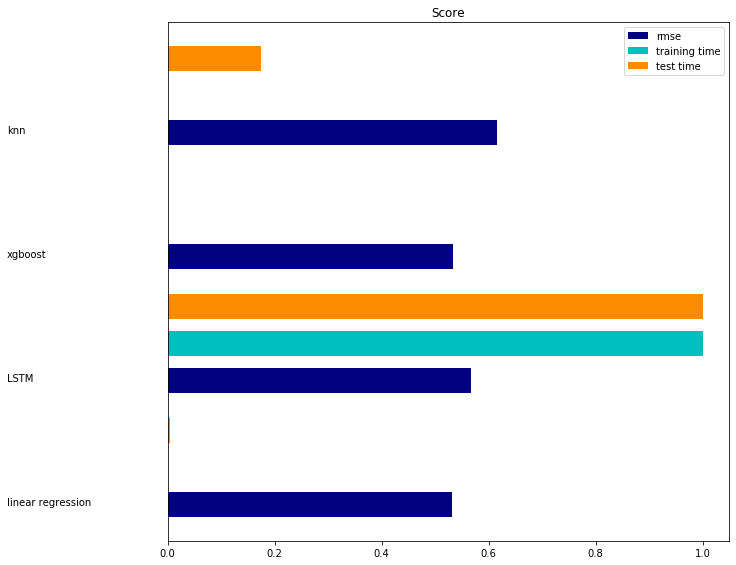

In [34]:
import numpy as np
import matplotlib.pyplot as plt
indices = np.arange(4)
clf_names=['linear regression','LSTM','xgboost','knn']
training_time=[lr_time,siam_time,xgb_train_time,knn_train_time]
test_time=[lr_pred_time,siam_pred_time,xgb_predict_time,knn_predict_time]
rmse=[lr_rmse_test,lstm_rmse_test,xgb_rmse_test,knn_rmse_test]
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, rmse, .2, label="rmse", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()